# Компьютерное зрение 2

Выполнил: Мишин Илья 381803-2

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests
from IPython.display import Image
import skimage.measure
import random

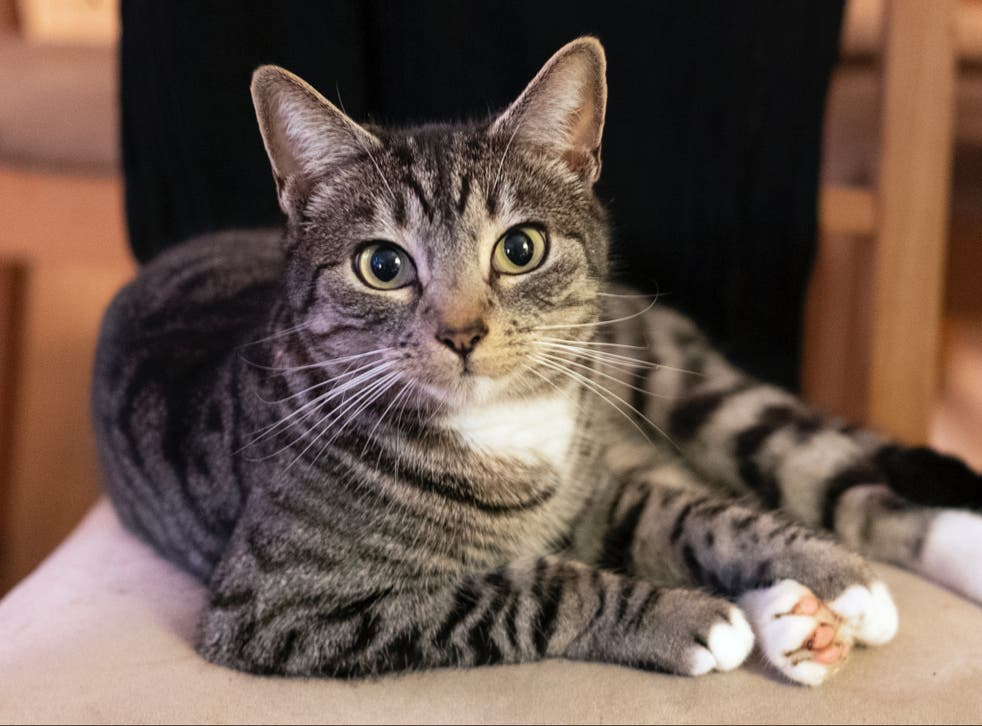

In [2]:
img_data = requests.get("https://static.independent.co.uk/2021/06/16/08/newFile-4.jpg?width=982&height=726&auto=webp&quality=75").content
with open('cat.jpg', 'wb') as handler:
    handler.write(img_data)
Image(img_data)

In [3]:
image = cv2.imread('cat.jpg')
imgB, imgG, imgR = cv2.split(image)
w, h, с = image.shape

In [4]:
def max_pooling(image):
    skimage.measure.block_reduce(image, (2,2), np.max)
    
def soft_max(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def convolution(image, kernel):
     imgB, imgG, imgR = cv2.split(image)
     kerB, kerG, kerR = cv2.split(kernel)
     resB = cv2.filter2D(imgB, -1, kerB)
     resG = cv2.filter2D(imgG, -1, kerG)
     resR = cv2.filter2D(imgR, -1, kerR)
     res = resB + resG + resR
     return res

In [5]:
kernel_1 = np.array([[[random.randint(0, 3) for l in range(3)] for j in range(3)] for i in range(3)])
kernel_2 = np.array([[[random.randint(0, 3) for l in range(3)] for j in range(3)] for i in range(3)])
kernel_3 = np.array([[[random.randint(0, 3) for l in range(3)] for j in range(3)] for i in range(3)])
kernel_4 = np.array([[[random.randint(0, 3) for l in range(3)] for j in range(3)] for i in range(3)])
kernel_5 = np.array([[[random.randint(0, 3) for l in range(3)] for j in range(3)] for i in range(3)])

1. Convolution

In [6]:
kernels = [kernel_1, kernel_2, kernel_3, kernel_4, kernel_5]

z_image = np.zeros(shape=(w, h))
image_out = np.array([z_image for i in range(5)])

for i in range(5):
    image_out[i] = convolution(image, kernels[i])

2. Normalization

In [7]:
for i in range(5):
    image_out[i] = cv2.normalize(image_out[i], None, alpha=2, beta=0.5, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

3. ReLU

In [8]:
for m in range(5):
    for i in range(w):
        for j in range(h):
            x = image_out[m][i][j]
            image_out[m][i][j] = (abs(x) + x) / 2

4. Max Pooling

In [9]:
zero_img = np.zeros(shape=(w-1, h-1))
image_out_2 = np.array([zero_img for i in range(5)])

for m in range(5):
    image_out_2[m] = max_pooling(image_out[m])

image_out = cv2.merge([image_out_2[0], image_out_2[1], image_out_2[2], image_out_2[3], image_out_2[4]])

5. Soft Max

In [10]:
for i in range(w-1):
    for j in range(h-1):
        image_out[i][j] = soft_max(image_out[i][j])


print(image_out.shape)

(725, 981, 5)


Получили на выходе 5 каналов